In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy.stats import gamma
from scipy.special import gamma as gammafun
from scipy.special import gammaln

import scipy

## Draw samples from true model 

In [25]:
lam = .4 
N = 1000
samples = np.random.poisson(lam=lam, size=N)

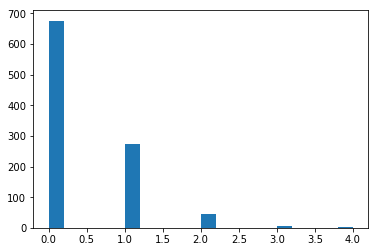

In [26]:
plt.hist(samples, bins='auto');

## Define models 

We use two Poisson models with different priors on lambda. The prior is a Gamma distribution in both cases, but with different alpha and beta

In [27]:
a1, b1 = 2., 0.5 
a2, b2 = 7.5, 1. 

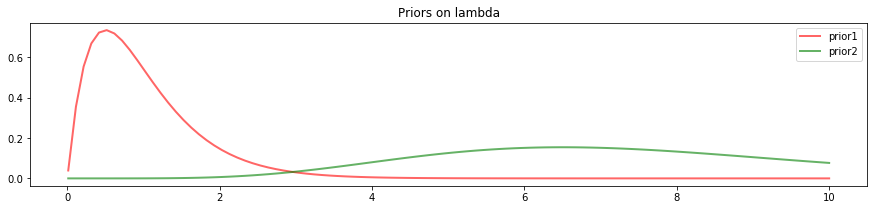

In [28]:
# plot the corresponding priors on lambda: 
plt.figure(figsize=(15, 3))
x = np.linspace(0.01, 10., 100)

plt.plot(x, gamma.pdf(x, a1, scale=b1), 'r-', lw=2, alpha=0.6, label='prior1')

plt.plot(x, gamma.pdf(x, a2, scale=b2), 'g-', lw=2, alpha=0.6, label='prior2')

plt.title('Priors on lambda')
plt.legend();

## Calculate model evidence

### Poisson
We have derived the closed form of the model evidence for a Poission distribution model with Gamma prior, it is 

$$
E_{poisson}(\alpha, \beta, x, N) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \frac{1}{\prod_{i=1}^{N} x_i!} \frac{\Gamma(\alpha + \sum x_i)}{(\beta + N)^{\alpha + \sum x_i}}
$$

For numerical stability we instead calculate the log evidence: 

$$
log (E_{poisson}) = \alpha log(\beta) - log(\Gamma(\alpha)) - \sum log(\Gamma(x_i + 1)) + log(\Gamma(\alpha + \sum x_i) - (\alpha + \sum x_i) log(\beta + N)
$$

In [32]:
def poisson_evidence(x, a, b, N, log=False): 
    x_sum = np.sum(x)
    log_xfac = np.sum(gammaln(x + 1))
        
    result = a * np.log(b) - gammaln(a) - log_xfac + gammaln(a + x_sum) - (a + x_sum)*np.log(b + N)
    
    return result if log else np.exp(result)

## Draw many data sets and calculate Bayes factor for each of them

We expect model 2 to be favoured because its prior is centered on the true value of lambda. 

In [30]:
e1 = []
e2 = []
for i in range(100): 
    samples = np.random.poisson(lam, N)
    e1.append(poisson_evidence(samples, a1, b1, N))
    e2.append(poisson_evidence(samples, a2, b2, N))

bf = np.array(e1) - np.array(e2)

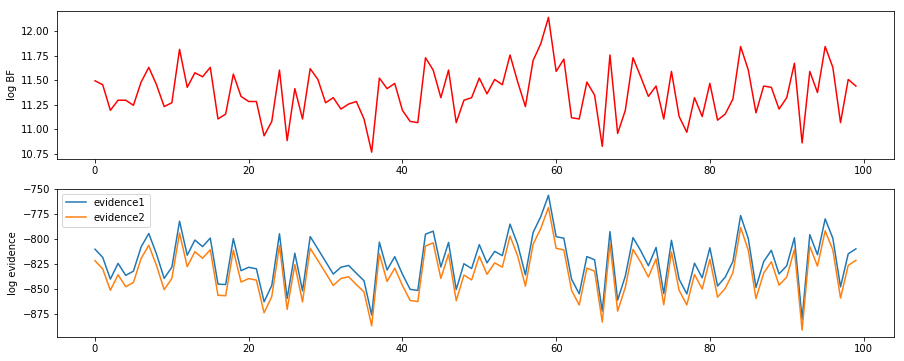

In [31]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(bf, 'r')
plt.ylabel('log BF')
plt.subplot(2, 1, 2)
plt.plot(e1)
plt.plot(e2)
plt.ylabel('log evidence')
plt.legend(['evidence1', 'evidence2']);